## Bank Account Fraud Supplementary Code
Using this as supplementary testing for Bank Account Fraud main notebook. Will run logistic regression and SMOTE.

In [2]:
import pandas as pd
import numpy as np
import itertools
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from imblearn.over_sampling import SMOTE, ADASYN
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


Load in Bank Account Fraud File and save as data frame before only keeping columns with Numeric Values.

In [3]:
baf_base = pd.read_csv('files/Base.csv')  

# Print the first five rows of data
baf_base.head()

,fraud_bool,income,name_email_similarity,prev_address_months_count,current_address_months_count,customer_age,days_since_request,intended_balcon_amount,payment_type,zip_count_4w,...,has_other_cards,proposed_credit_limit,foreign_request,source,session_length_in_minutes,device_os,keep_alive_session,device_distinct_emails_8w,device_fraud_count,month
0,0,0.3,0.986506,-1,25,40,0.006735,102.453711,AA,1059,...,0,1500.0,0,INTERNET,16.224843,linux,1,1,0,0
1,0,0.8,0.617426,-1,89,20,0.010095,-0.849551,AD,1658,...,0,1500.0,0,INTERNET,3.363854,other,1,1,0,0
2,0,0.8,0.996707,9,14,40,0.012316,-1.490386,AB,1095,...,0,200.0,0,INTERNET,22.730559,windows,0,1,0,0
3,0,0.6,0.475100,11,14,30,0.006991,-1.863101,AB,3483,...,0,200.0,0,INTERNET,15.215816,linux,1,1,0,0
4,0,0.9,0.842307,-1,29,40,5.742626,47.152498,AA,2339,...,0,200.0,0,INTERNET,3.743048,other,0,1,0,0


## Exploratory Data Analysis (EDA)

In [4]:
baf_base.describe()

,fraud_bool,income,name_email_similarity,prev_address_months_count,current_address_months_count,customer_age,days_since_request,intended_balcon_amount,zip_count_4w,velocity_6h,...,phone_mobile_valid,bank_months_count,has_other_cards,proposed_credit_limit,foreign_request,session_length_in_minutes,keep_alive_session,device_distinct_emails_8w,device_fraud_count,month
count,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1.000000e+06,1000000.000000,1000000.000000,1000000.000000,...,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.0,1000000.000000
mean,0.011029,0.562696,0.493694,16.718568,86.587867,33.689080,1.025705e+00,8.661499,1572.692049,5665.296605,...,0.889676,10.839303,0.222988,515.851010,0.025242,7.544940,0.576947,1.018312,0.0,3.288674
std,0.104438,0.290343,0.289125,44.046230,88.406599,12.025799,5.381835e+00,20.236155,1005.374565,3009.380665,...,0.313293,12.116875,0.416251,487.559902,0.156859,8.033106,0.494044,0.180761,0.0,2.209994
min,0.000000,0.100000,0.000001,-1.000000,-1.000000,10.000000,4.036860e-09,-15.530555,1.000000,-170.603072,...,0.000000,-1.000000,0.000000,190.000000,0.000000,-1.000000,0.000000,-1.000000,0.0,0.000000
25%,0.000000,0.300000,0.225216,-1.000000,19.000000,20.000000,7.193246e-03,-1.181488,894.000000,3436.365848,...,1.000000,-1.000000,0.000000,200.000000,0.000000,3.103053,0.000000,1.000000,0.0,1.000000
50%,0.000000,0.600000,0.492153,-1.000000,52.000000,30.000000,1.517574e-02,-0.830507,1263.000000,5319.769349,...,1.000000,5.000000,0.000000,200.000000,0.000000,5.114321,1.000000,1.000000,0.0,3.000000
75%,0.000000,0.800000,0.755567,12.000000,130.000000,40.000000,2.633069e-02,4.984176,1944.000000,7680.717827,...,1.000000,25.000000,0.000000,500.000000,0.000000,8.866131,1.000000,1.000000,0.0,5.000000
max,1.000000,0.900000,0.999999,383.000000,428.000000,90.000000,7.845690e+01,112.956928,6700.000000,16715.565404,...,1.000000,32.000000,1.000000,2100.000000,1.000000,85.899143,1.000000,2.000000,0.0,7.000000


In [14]:
baf_base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 32 columns):
 #   Column                            Non-Null Count    Dtype  
---  ------                            --------------    -----  
 0   fraud_bool                        1000000 non-null  int64  
 1   income                            1000000 non-null  float64
 2   name_email_similarity             1000000 non-null  float64
 3   prev_address_months_count         1000000 non-null  int64  
 4   current_address_months_count      1000000 non-null  int64  
 5   customer_age                      1000000 non-null  int64  
 6   days_since_request                1000000 non-null  float64
 7   intended_balcon_amount            1000000 non-null  float64
 8   payment_type                      1000000 non-null  object 
 9   zip_count_4w                      1000000 non-null  int64  
 10  velocity_6h                       1000000 non-null  float64
 11  velocity_24h                      1000

In [5]:
baf_base['fraud_bool'].value_counts()

fraud_bool
0    988971
1     11029
Name: count, dtype: int64

In [6]:
baf_base['fraud_bool'].value_counts()/len(baf_base)

fraud_bool
0    0.988971
1    0.011029
Name: count, dtype: float64

Text(0.5, 1.0, 'Training Set')

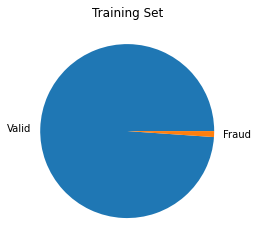

In [13]:
labels = 'Valid', 'Fraud'
sizes = [988971, 11029]

fig, ax = plt.subplots()
ax.pie(sizes, labels=labels)
ax.set_title("Training Set")

### Make independent dataframes for whether the account if fraudulanet or valid and show summary stats of each variable for the respective dataframe

In [28]:
baf_fraud = baf_base.loc[baf_base['fraud_bool'] == 1]
baf_valid = baf_base.loc[baf_base['fraud_bool'] == 0]

In [29]:
baf_fraud.describe()

,fraud_bool,income,name_email_similarity,prev_address_months_count,current_address_months_count,customer_age,days_since_request,intended_balcon_amount,zip_count_4w,velocity_6h,...,phone_mobile_valid,bank_months_count,has_other_cards,proposed_credit_limit,foreign_request,session_length_in_minutes,keep_alive_session,device_distinct_emails_8w,device_fraud_count,month
count,11029.0,11029.000000,11029.000000,11029.000000,11029.000000,11029.000000,11029.000000,11029.000000,11029.000000,11029.000000,...,11029.000000,11029.000000,11029.000000,11029.000000,11029.000000,11029.000000,11029.000000,11029.000000,11029.0,11029.000000
mean,1.0,0.686635,0.393161,5.861365,114.801161,40.858645,1.054615,3.962009,1622.311542,5183.913444,...,0.850576,10.469580,0.084414,833.986762,0.050322,8.229520,0.341645,1.079427,0.0,3.565962
std,0.0,0.265579,0.295607,32.816956,85.324351,13.086334,5.707977,16.622067,1005.687071,2902.298679,...,0.356522,12.875992,0.278020,643.287556,0.218618,9.681103,0.474283,0.320447,0.0,2.312055
min,1.0,0.100000,0.000132,-1.000000,-1.000000,10.000000,0.000001,-8.249792,18.000000,64.422571,...,0.000000,-1.000000,0.000000,190.000000,0.000000,-1.000000,0.000000,-1.000000,0.0,0.000000
25%,1.0,0.600000,0.134257,-1.000000,53.000000,30.000000,0.005911,-1.195618,909.000000,2894.349366,...,1.000000,-1.000000,0.000000,200.000000,0.000000,3.249171,0.000000,1.000000,0.0,2.000000
50%,1.0,0.800000,0.292420,-1.000000,94.000000,40.000000,0.013094,-0.900578,1328.000000,4916.464728,...,1.000000,2.000000,0.000000,500.000000,0.000000,5.121820,0.000000,1.000000,0.0,4.000000
75%,1.0,0.900000,0.676543,-1.000000,156.000000,50.000000,0.023265,-0.562268,2050.000000,7128.603281,...,1.000000,25.000000,0.000000,1500.000000,0.000000,8.628160,1.000000,1.000000,0.0,6.000000
max,1.0,0.900000,0.999953,357.000000,392.000000,90.000000,75.495921,111.321272,6368.000000,16084.617170,...,1.000000,31.000000,1.000000,2100.000000,1.000000,77.730242,1.000000,2.000000,0.0,7.000000


In [30]:
baf_valid.describe()

,fraud_bool,income,name_email_similarity,prev_address_months_count,current_address_months_count,customer_age,days_since_request,intended_balcon_amount,zip_count_4w,velocity_6h,...,phone_mobile_valid,bank_months_count,has_other_cards,proposed_credit_limit,foreign_request,session_length_in_minutes,keep_alive_session,device_distinct_emails_8w,device_fraud_count,month
count,988971.0,988971.000000,988971.000000,988971.000000,988971.000000,988971.000000,9.889710e+05,988971.000000,988971.000000,988971.000000,...,988971.000000,988971.000000,988971.000000,988971.000000,988971.000000,988971.000000,988971.000000,988971.000000,988971.0,988971.000000
mean,0.0,0.561313,0.494815,16.839647,86.273232,33.609125,1.025383e+00,8.713907,1572.138693,5670.664988,...,0.890112,10.843426,0.224533,512.303162,0.024962,7.537306,0.579571,1.017630,0.0,3.285582
std,0.0,0.290309,0.288855,44.140319,88.389648,11.989302,5.378088e+00,20.266690,1005.357780,3010.120768,...,0.312750,12.108084,0.417275,484.365435,0.156010,8.012493,0.493628,0.178471,0.0,2.208634
min,0.0,0.100000,0.000001,-1.000000,-1.000000,10.000000,4.036860e-09,-15.530555,1.000000,-170.603072,...,0.000000,-1.000000,0.000000,190.000000,0.000000,-1.000000,0.000000,-1.000000,0.0,0.000000
25%,0.0,0.300000,0.226963,-1.000000,19.000000,20.000000,7.208821e-03,-1.181296,894.000000,3441.756464,...,1.000000,-1.000000,0.000000,200.000000,0.000000,3.101249,0.000000,1.000000,0.0,1.000000
50%,0.0,0.600000,0.493571,-1.000000,52.000000,30.000000,1.520335e-02,-0.829552,1262.000000,5324.540439,...,1.000000,5.000000,0.000000,200.000000,0.000000,5.114289,1.000000,1.000000,0.0,3.000000
75%,0.0,0.800000,0.756211,13.000000,129.000000,40.000000,2.636146e-02,5.789258,1943.000000,7686.405675,...,1.000000,25.000000,0.000000,500.000000,0.000000,8.868895,1.000000,1.000000,0.0,5.000000
max,0.0,0.900000,0.999999,383.000000,428.000000,90.000000,7.845690e+01,112.956928,6700.000000,16715.565404,...,1.000000,32.000000,1.000000,2100.000000,1.000000,85.899143,1.000000,2.000000,0.0,7.000000


session_length_in_minutes
-1.000000     18
 3.505442      2
 4.036394      1
 13.034989     1
 1.953310      1
              ..
 5.417830      1
 2.594126      1
 2.904633      1
 34.437990     1
 9.943046      1
Name: count, Length: 11011, dtype: int64


## Convert to numeric only data frame
Preview the columns and variables we will work with

In [ ]:
# Count the number of fraudulent/infraudulent purchases
baf_base['fraud_bool'].value_counts()
baf_num = baf_base.select_dtypes(include=np.number)
baf_num

## Predictor and target variables

Using train test split, with the target being the variable that tells if the account is fradulent.

In [ ]:
# Your code here
y = baf_num['fraud_bool']
X = baf_num.drop(columns=['fraud_bool'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

Show counts of train and test sets.

In [ ]:
# Training set
print(y_train.value_counts())
print('\n')
# Test set
print(y_test.value_counts())

## Make a basic logisitic regression model

Will plot the ROC curve and print AUC after


In [ ]:
# Initial Model
logr = LogisticRegression(fit_intercept=False, solver='liblinear')

# Probability scores for test set
y_score = logr.fit(X_train, y_train).decision_function(X_test)
# False positive rate and true positive rate
fpr, tpr, thresholds = roc_curve(y_test, y_score)


# Seaborn's beautiful styling
sns.set_style('darkgrid', {'axes.facecolor': '0.9'})

# Print AUC
print('AUC: {}'.format(auc(fpr, tpr)))

# Plot the ROC curve
plt.figure(figsize=(10, 8))
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve')
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.yticks([i/20.0 for i in range(21)])
plt.xticks([i/20.0 for i in range(21)])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

Make pred the prediction and create a confusion matrix after.

In [ ]:
# Pred
pred = logr.predict(X_test)
# Get Values
accuracy = accuracy_score(y_test, pred)
precision = precision_score(y_test,pred)
recall = recall_score(y_test, pred)
f1 = f1_score(y_test, pred)
 
print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}')
print('Confusion Matrix:')

In [ ]:
# Plot confusion matrix of the test set 
cm = confusion_matrix(y_test, pred, labels=logr.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=logr.classes_)
disp.plot()
plt.grid(False)
plt.show()

## Tuning model

Try to test different parameters. Only leave the one highlighted for time as each run may take a few minutes.

In [ ]:
# Now let's compare a few different regularization performances on the dataset:
#C_param_range = [0.001]
C_param_range = [0.001, 0.01, 0.1, 1, 10, 100]
names = [0.001, 0.01, 0.1, 1, 10, 100]
colors = sns.color_palette('Set2')

plt.figure(figsize=(10, 8))

for n, c in enumerate(C_param_range):
    logr = LogisticRegression(fit_intercept=False, C=c, solver='liblinear')
    model_log = logr.fit(X_train, y_train)

    y_hat_test = logr.predict(X_test)
    y_score = logr.fit(X_train, y_train).decision_function(X_test)

    fpr, tpr, thresholds = roc_curve(y_test, y_score)
    print('AUC for {}: {}'.format(names[n], auc(fpr, tpr)))
    lw = 2
    plt.plot(fpr, tpr, color=colors[n],
             lw=lw, label='ROC curve Normalization Weight: {}'.format(names[n]))

plt.plot([0, 1], [0, 1], color='blue', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])

plt.yticks([i/20.0 for i in range(21)])
plt.xticks([i/20.0 for i in range(21)])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

### SMOTE

SMOTE to compare different performance and check for improvements.

In [ ]:
#pip install threadpoolctl==3.1.0

In [ ]:
# Previous original class distribution
print(y_train.value_counts())

# Fit SMOTE to training data
X_train_resampled, y_train_resampled = SMOTE().fit_resample(X_train, y_train)

# Preview synthetic sample class distribution
print('\n')
print(pd.Series(y_train_resampled).value_counts()) 

fig, ax = plt.subplots(figsize = (20, 10))
sns.heatmap(X_train_resampled.corr())

Same as before, only leaving one parameter active for time when rerunning.

In [ ]:
# Now let's compare a few different regularization performances on the dataset
#C_param_range = [0.005]
C_param_range = [0.005, 0.1, 0.2, 0.5, 0.8, 1, 1.25, 1.5, 2]
names = [0.005, 0.1, 0.2, 0.5, 0.8, 1, 1.25, 1.5, 2]
colors = sns.color_palette('Set2', n_colors=len(names))

plt.figure(figsize=(10, 8))

# Write a for loop that builds models for each value of C_param_range, prints the AUC and plots the ROC
for n, c in enumerate(C_param_range):
    logr = LogisticRegression(fit_intercept=False, C=c, solver='liblinear')
    model_log = logr.fit(X_train_resampled, y_train_resampled)

    y_hat_test = logr.predict(X_test)
    y_score = logr.fit(X_train_resampled, y_train_resampled).decision_function(X_test)
    fpr, tpr, thresholds = roc_curve(y_test, y_score)
    
    print('AUC for {}: {}'.format(names[n], auc(fpr, tpr))) 
    lw = 2
    plt.plot(fpr, tpr, color=colors[n],
             lw=lw, label='ROC curve Regularization Weight: {}'.format(names[n]))


plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.yticks([i/20.0 for i in range(21)])
plt.xticks([i/20.0 for i in range(21)])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

Values very similiar. Some adjustments needed. Will also have to consider the few non-numerical variables in the original data set and their possible effect.

In [ ]:
# Previous original class distribution
print(y.value_counts()) 
X_resampled, y_resampled = SMOTE().fit_resample(X, y) 
# Preview synthetic sample class distribution
print('---------------------------------')
print(pd.Series(y_resampled).value_counts()) 

# Split resampled data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, random_state=0)

# Now let's compare a few different regularization performances on the dataset:
#C_param_range = [0.005]
C_param_range = [0.005, 0.1, 0.2, 0.3, 0.5, 0.6, 0.7, 0.8]
names = [0.005, 0.1, 0.2, 0.3, 0.5, 0.6, 0.7, 0.8, 0.9]
colors = sns.color_palette('Set2', n_colors=len(names))

plt.figure(figsize=(10, 8))

for n, c in enumerate(C_param_range):
    # Fit a model
    logreg = LogisticRegression(fit_intercept=False, C=c, solver='liblinear')
    model_log = logreg.fit(X_train, y_train)

    # Predict
    y_hat_test = logreg.predict(X_test)

    y_score = logreg.fit(X_train, y_train).decision_function(X_test)

    fpr, tpr, thresholds = roc_curve(y_test, y_score)
    print('----------------------------------------------')
    print('AUC for {}: {}'.format(names[n], auc(fpr, tpr)))
    lw = 2
    plt.plot(fpr, tpr, color=colors[n],
             lw=lw, label='ROC curve Normalization Weight: {}'.format(names[n]))
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.yticks([i/20.0 for i in range(21)])
plt.xticks([i/20.0 for i in range(21)])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

accuracy = accuracy_score(y_test, y_hat_test)
precision = precision_score(y_test, y_hat_test)
recall = recall_score(y_test, y_hat_test)
f1 = f1_score(y_test, y_hat_test)
 
print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}')
print('Confusion Matrix:')